In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from os import listdir
from os.path import isfile, join

import PIL
from PIL import Image

In [4]:
#télécharger les datasets
X_train = pd.read_csv("/Users/ayseaylinkaya/Desktop/Datascientist/Project Rakuten/X_train_update.csv") 
X_test = pd.read_csv("/Users/ayseaylinkaya/Desktop/Datascientist/Project Rakuten/X_test_update.csv") 
y_train = pd.read_csv("/Users/ayseaylinkaya/Desktop/Datascientist/Project Rakuten/Y_train_CVw08PX.csv") 

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   84916 non-null  int64 
 1   designation  84916 non-null  object
 2   description  55116 non-null  object
 3   productid    84916 non-null  int64 
 4   imageid      84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.2+ MB


In [6]:
#identifier les classes de produits
y_train["prdtypecode"].unique()

array([  10, 2280,   50, 1280, 2705, 2522, 2582, 1560, 1281, 1920, 2403,
       1140, 2583, 1180, 1300, 2462, 1160, 2060,   40,   60, 1320, 1302,
       2220, 2905, 2585, 1940, 1301])

In [7]:
#fusionner les training sets pour analyser les articles par classe
X_train = X_train.sort_values(by = 'Unnamed: 0', ascending = True)
y_train = y_train.sort_values(by = 'Unnamed: 0', ascending = True)
part2 = X_train[X_train.columns[3:]]
df = pd.concat([y_train,part2], axis=1)
df["image_name"] = "image_" + df.imageid.map(str)+ "_product_" + df.productid.map(str) + ".jpg"
df["image_name"] = df["image_name"].astype(str)
df['fullpath']= '/Users/ayseaylinkaya/Desktop/Datascientist/Project Rakuten/images/image_train/'+ df['image_name']
df.head()

,Unnamed: 0,prdtypecode,productid,imageid,image_name,fullpath
0,0,10,3804725264,1263597046,image_1263597046_product_3804725264.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
1,1,2280,436067568,1008141237,image_1008141237_product_436067568.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
2,2,50,201115110,938777978,image_938777978_product_201115110.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
3,3,1280,50418756,457047496,image_457047496_product_50418756.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
4,4,2705,278535884,1077757786,image_1077757786_product_278535884.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...


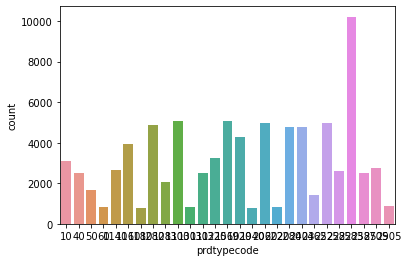

In [8]:
#analyses rapides sur les classes
df_sorted = df.sort_values("prdtypecode")
sns.countplot(x = "prdtypecode", data= df_sorted);

In [9]:
df_grouped = df.groupby("prdtypecode").count()
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.sort_values("productid",ascending = False)
df_grouped["shareintotal"]= df_grouped["productid"]/ df_grouped["productid"].sum()
df_grouped.head()

,prdtypecode,Unnamed: 0,productid,imageid,image_name,fullpath,shareintotal
23,2583,10209,10209,10209,10209,10209,0.120225
13,1560,5073,5073,5073,5073,5073,0.059741
9,1300,5045,5045,5045,5045,5045,0.059412
16,2060,4993,4993,4993,4993,4993,0.058799
21,2522,4989,4989,4989,4989,4989,0.058752


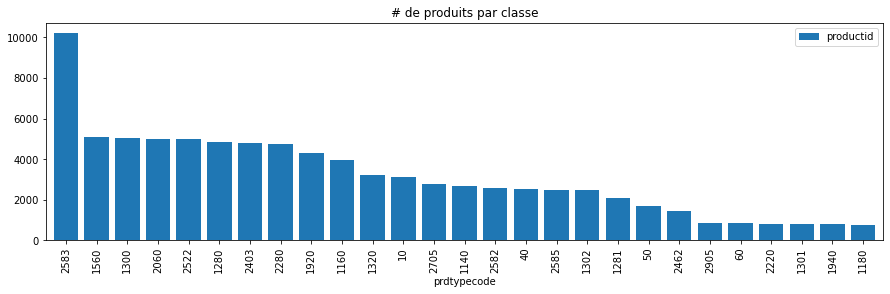

In [10]:
df_grouped.plot(x='prdtypecode', y='productid', kind='bar',figsize=(15,4), width = 0.8)
plt.title("# de produits par classe");

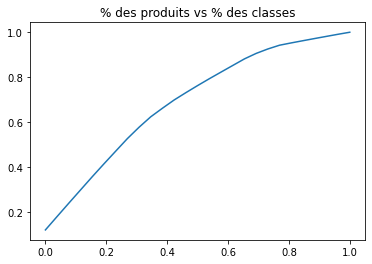

In [11]:
cum_sales = np.cumsum(df_grouped["shareintotal"])
# Borrowing the linspace trick from ebarr
x_vals = np.linspace(0, 100, len(cum_sales))
plt.plot(x_vals/100, cum_sales)
plt.title("% des produits vs % des classes")
plt.show()

In [12]:
df_2583 = df[df['prdtypecode']==2583]
df_2583 = df_2583.head(20)

images_2583 = np.array([np.array(Image.open(fname)) for fname in df_2583['fullpath']])
images_2583.shape 

(20, 500, 500, 3)

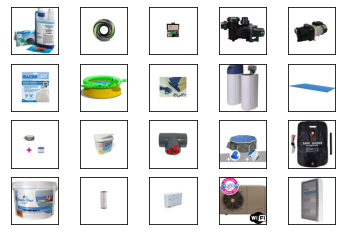

In [13]:
fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2583[i])
#Piscine et accessoire

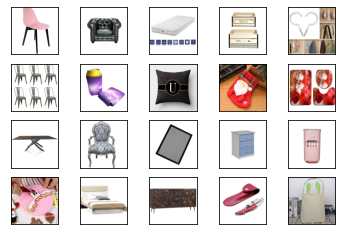

In [14]:
df_1560 = df[df['prdtypecode']==1560]
df_1560 = df_1560.head(20)

images_1560 = np.array([np.array(Image.open(fname)) for fname in df_1560['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1560[i])
#Equipement cuisine 

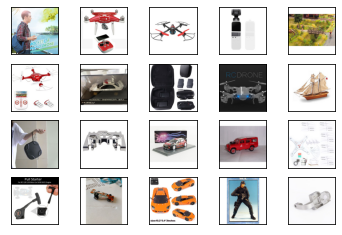

In [15]:
df_1300 = df[df['prdtypecode']==1300]
df_1300 = df_1300.head(20)

images_1300 = np.array([np.array(Image.open(fname)) for fname in df_1300['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1300[i])
#Drone/Quadcopter

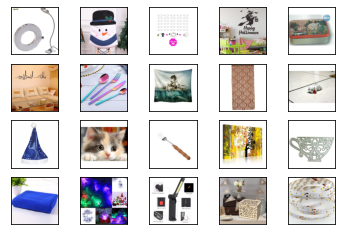

In [16]:
df_2060 = df[df['prdtypecode']==2060]
df_2060 = df_2060.head(20)

images_2060 = np.array([np.array(Image.open(fname)) for fname in df_2060['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2060[i])
#Equipement intérieur/Salle de bain/Lampe

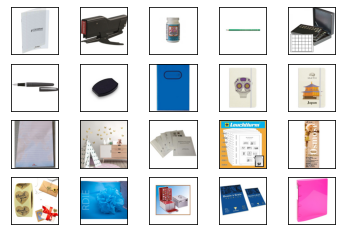

In [17]:
df_2522 = df[df['prdtypecode']==2522]
df_2522 = df_2522.head(20)

images_2522 = np.array([np.array(Image.open(fname)) for fname in df_2522['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2522[i])
#Fourniture bureau

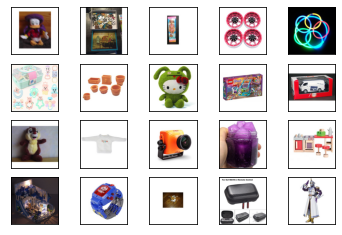

In [18]:
df_1280 = df[df['prdtypecode']==1280]
df_1280 = df_1280.head(20)

images_1280 = np.array([np.array(Image.open(fname)) for fname in df_1280['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1280[i])
#Jouet enfant

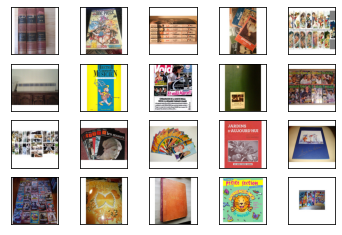

In [19]:
df_2403 = df[df['prdtypecode']==2403]
df_2403 = df_2403.head(20)

images_2403 = np.array([np.array(Image.open(fname)) for fname in df_2403['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2403[i])
#Livre/magazine

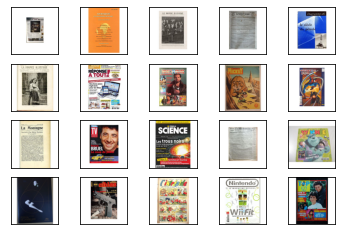

In [20]:
df_2280 = df[df['prdtypecode']==2280]
df_2280 = df_2280.head(20)

images_2280 = np.array([np.array(Image.open(fname)) for fname in df_2280['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2280[i])
#Livre histoire /magazine

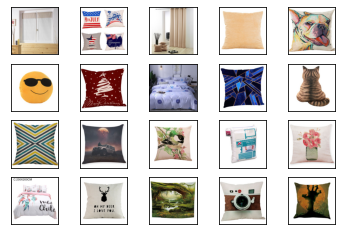

In [21]:
df_1920 = df[df['prdtypecode']==1920]
df_1920 = df_1920.head(20)

images_1920 = np.array([np.array(Image.open(fname)) for fname in df_1920['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1920[i])
#Equipement intérieur ==> Textile maison

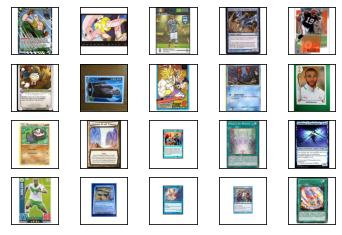

In [22]:
df_1160 = df[df['prdtypecode']==1160]
df_1160 = df_1160.head(20)

images_1160 = np.array([np.array(Image.open(fname)) for fname in df_1160['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1160[i])
#Carte de jeux collection 

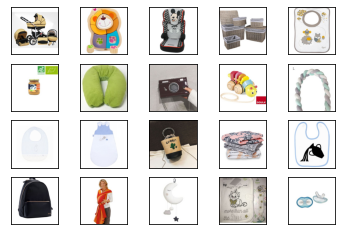

In [23]:
df_1320 = df[df['prdtypecode']==1320]
df_1320 = df_1320.head(20)

images_1320 = np.array([np.array(Image.open(fname)) for fname in df_1320['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1320[i])
#Equipement bébé

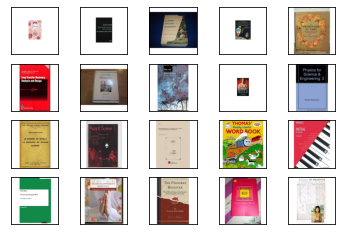

In [24]:
df_10 = df[df['prdtypecode']==10]
df_10 = df_10.head(20)

images_10 = np.array([np.array(Image.open(fname)) for fname in df_10['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_10[i])
#Livre histoire geographie

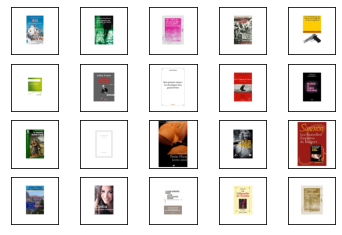

In [25]:
df_2705 = df[df['prdtypecode']==2705]
df_2705 = df_2705.head(20)

images_2705 = np.array([np.array(Image.open(fname)) for fname in df_2705['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2705[i])
#Livre histoire politique

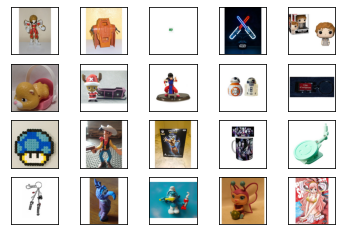

In [26]:
df_1140 = df[df['prdtypecode']==1140]
df_1140 = df_1140.head(20)

images_1140 = np.array([np.array(Image.open(fname)) for fname in df_1140['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1140[i])

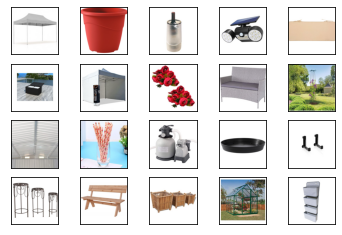

In [27]:
df_2582 = df[df['prdtypecode']==2582]
df_2582 = df_2582.head(20)

images_2582 = np.array([np.array(Image.open(fname)) for fname in df_2582['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2582[i])
#Equipement extérieurs 

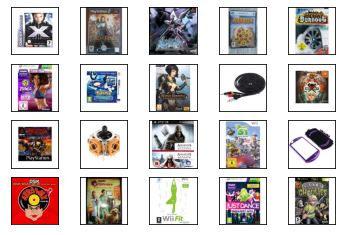

In [28]:
df_40 = df[df['prdtypecode']==40]
df_40 = df_40.head(20)

images_40 = np.array([np.array(Image.open(fname)) for fname in df_40['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_40[i])
#Jeux video import international

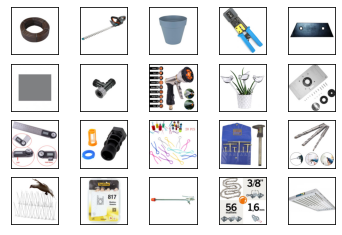

In [29]:
df_2585 = df[df['prdtypecode']==2585]
df_2585 = df_2585.head(20)

images_2585 = np.array([np.array(Image.open(fname)) for fname in df_2585['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2585[i])
#Outils jardin

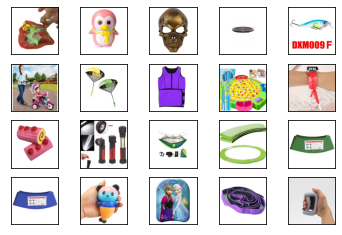

In [30]:
df_1302 = df[df['prdtypecode']==1302]
df_1302 = df_1302.head(20)

images_1302 = np.array([np.array(Image.open(fname)) for fname in df_1302['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1302[i])
#Equipement camping/pêche

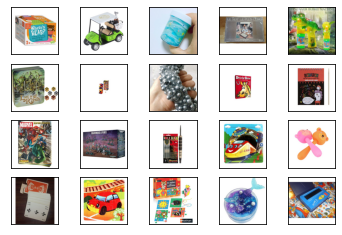

In [31]:
df_1281 = df[df['prdtypecode']==1281]
df_1281 = df_1281.head(20)

images_1281 = np.array([np.array(Image.open(fname)) for fname in df_1281['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1281[i])
#Jouet enfant / Collection carte / Animaux / parfum/ DIVERS

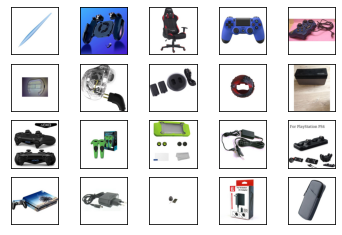

In [32]:
df_50 = df[df['prdtypecode']==50]
df_50 = df_50.head(20)

images_50 = np.array([np.array(Image.open(fname)) for fname in df_50['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_50[i])
#Jeux video avec intitulé de console

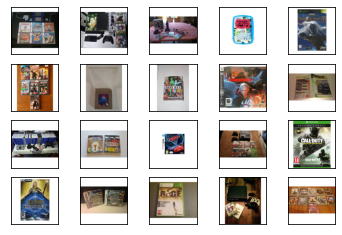

In [33]:
df_2462 = df[df['prdtypecode']==2462]
df_2462 = df_2462.head(20)

images_2462 = np.array([np.array(Image.open(fname)) for fname in df_2462['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2462[i])
#Jeux video avec intitulé de console 2

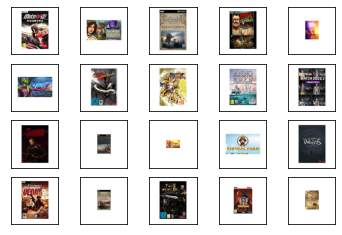

In [34]:
df_2905 = df[df['prdtypecode']==2905]
df_2905 = df_2905.head(20)

images_2905 = np.array([np.array(Image.open(fname)) for fname in df_2905['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2905[i])
#Telechargement Jeux video dématerialisé ( Extension de jeux)

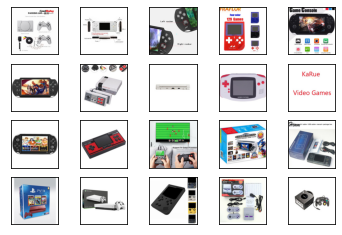

In [35]:
df_60 = df[df['prdtypecode']==60]
df_60 = df_60.head(20)

images_60 = np.array([np.array(Image.open(fname)) for fname in df_60['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_60[i])
#Console Jeux video portable

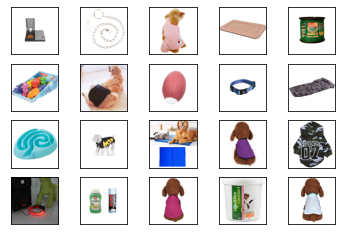

In [36]:
df_2220 = df[df['prdtypecode']==2220]
df_2220 = df_2220.head(20)

images_2220 = np.array([np.array(Image.open(fname)) for fname in df_2220['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_2220[i])
#Animaux/pets

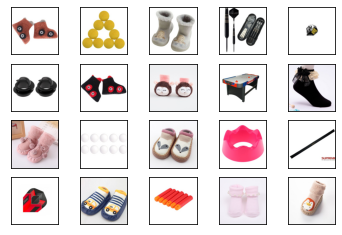

In [37]:
df_1301 = df[df['prdtypecode']==1301]
df_1301 = df_1301.head(20)

images_1301 = np.array([np.array(Image.open(fname)) for fname in df_1301['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1301[i])
#Habillement bébé enfant garçon fille

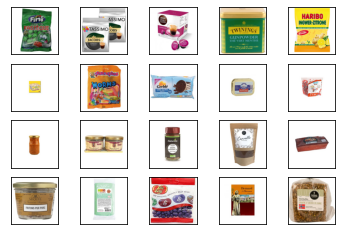

In [38]:
df_1940 = df[df['prdtypecode']==1940]
df_1940 = df_1940.head(20)

images_1940 = np.array([np.array(Image.open(fname)) for fname in df_1940['fullpath']])

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1940[i])
#Café/Dosette ==> Café/Dosette/Thé

In [ ]:
#for clas in df['prdtypecode']:
#    print("Classe #: ", clas)
#    images = np.array([np.array(Image.open(fname)) for fname in df[df['prdtypecode']==clas]]['fullpath'].head(20)])
#    fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
#    for i, axi in enumerate(ax.flat):
#        axi.imshow(images[i])

In [55]:
df_1301 = df[df['prdtypecode']==1301]
df_1301 = df_1301.head(20)

images_1301 = np.array([np.array(Image.open(fname)) for fname in df_1301['fullpath']]) #IMPORTER PLUS PETIT
#Habillement bébé enfant garçon fille

In [82]:
df_1301

,Unnamed: 0,prdtypecode,productid,imageid,image_name,fullpath
257,257,1301,3898725495,1261419198,image_1261419198_product_3898725495.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
289,289,1301,136255802,890156155,image_890156155_product_136255802.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
945,945,1301,3898728616,1261426616,image_1261426616_product_3898728616.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
989,989,1301,3578689082,1223057800,image_1223057800_product_3578689082.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
1333,1333,1301,149878775,905285490,image_905285490_product_149878775.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
1370,1370,1301,4144682755,1304659418,image_1304659418_product_4144682755.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
1394,1394,1301,3898725476,1261418924,image_1261418924_product_3898725476.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
1560,1560,1301,3898719196,1261388780,image_1261388780_product_3898719196.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
1677,1677,1301,57724913,696858194,image_696858194_product_57724913.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...
1805,1805,1301,3898721977,1261409297,image_1261409297_product_3898721977.jpg,/Users/ayseaylinkaya/Desktop/Datascientist/Pro...


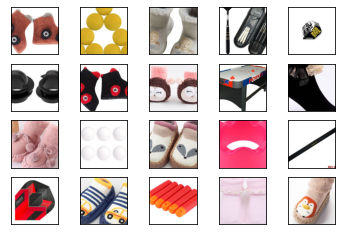

In [131]:
images_1301.shape

images_1301_red = images_1301[:,100:400,100:400,:]

fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_1301_red[i])